
% ISOM 3025 Quiz2
% Yi Ding
% 7 March 2024


## Quiz 2

### Q1

Build a weather forecast model with three climate conditions, that is, sunny,  cloudy and rainy.
The transition matrix is as follows:

$$0.6,\;0.2,\; 0.2\\
0.3,\;0.4,\; 0.3\\
0.2,\;0.3,\;0.5$$
representing
$$P(sunny|sunny),\;P(cloudy|sunny),\; P(rainy|sunny)\\
P(sunny|cloudy),\;P(cloudy|cloudy),\; P(rainy|cloudy)\\
P(sunny|rainy),P(cloudy|rainy),\; P(rainy|rainy).
$$

a. Suppose that today is sunny. Simulate weather process for the next 100 days. and plot the results

b. Do a weather forecast for the next 30 days given that today is sunny, respectively. plot your results

c. Compuate the long-run unconditional stationary distribution of the weather, i.e., $P(sunny),\;P(cloudy),\; P(rainy)$.


Weather initial condition = Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Cloudy
Sunny
Cloudy
Rainy
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Cloudy
Cloudy
Cloudy
Sunny
Sunny
Cloudy
Rainy
Rainy
Cloudy
Cloudy
Sunny
Sunny
Rainy
Cloudy
Cloudy
Rainy
Sunny
Sunny
Cloudy
Sunny
Sunny
Cloudy
Rainy
Rainy
Rainy
Rainy
Cloudy
Cloudy
Cloudy
Rainy
Rainy
Rainy
Cloudy
Cloudy
Cloudy
Sunny
Cloudy
Cloudy
Cloudy
Sunny
Sunny
Cloudy
Sunny
Sunny
Sunny
Rainy
Cloudy
Rainy
Rainy
Rainy
Rainy
Sunny
Sunny
Cloudy
Sunny
Rainy
Cloudy
Sunny
Sunny
Rainy
Rainy
Sunny
Cloudy
Sunny
Rainy
Sunny
Rainy
Rainy
Sunny
Sunny
Cloudy
Cloudy
Cloudy
Sunny
Cloudy


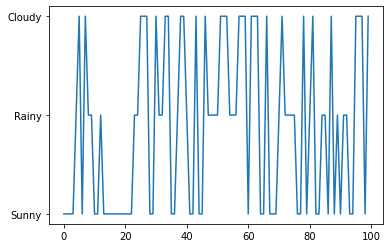

In [5]:
#Write your answer here.
### Q1a
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3025)

# define the possible states of the weather conditions:
StatesData = ['Sunny', 'Cloudy', 'Rainy']

# transition between the weather conditions will be set as follows:
TransitionStates = [
    ['Su-to-Su','Su-to-Cl', 'Su-to-Ra'],  
    ['Cl-to-Su','Cl-to-Cl', 'Cl-to-Ra'], 
    ['Ra-to-Su','Ra-to-Cl', 'Ra-to-Ra']  
]

TransitionMatrix = [
    [0.6, 0.2, 0.2], 
    [0.3, 0.4, 0.3],  
    [0.2, 0.3, 0.5]  
]

WeatherProcess = list()
NumDays=100
TodayCond = StatesData[0]
print('Weather initial condition =',TodayCond)

# Simulate the weather for NumDays
for i in range(NumDays):
    if TodayCond == 'Sunny':
        TodayCond = np.random.choice(StatesData, replace=True, p=TransitionMatrix[0])
    elif TodayCond == 'Cloudy':
        TodayCond = np.random.choice(StatesData, replace=True, p=TransitionMatrix[1])
    else:  # TodayCond == 'Rainy'
        TodayCond = np.random.choice(StatesData, replace=True, p=TransitionMatrix[2])
        
    WeatherProcess.append(TodayCond)
    print(TodayCond)
    
    
plt.plot(WeatherProcess)
plt.show()

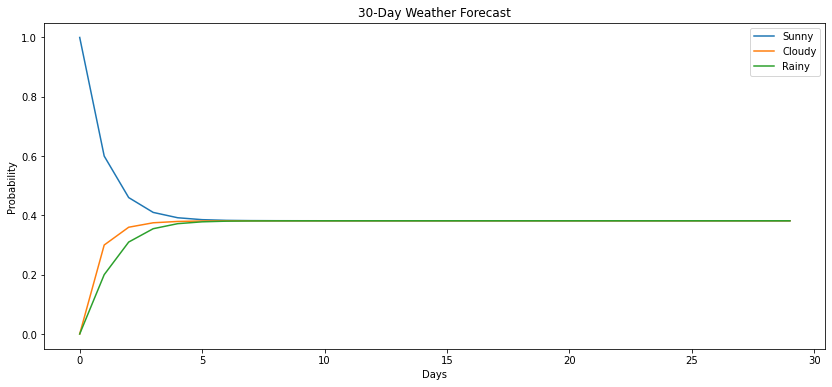

In [9]:
#Write your answer here.
### Q1bi Do a weather forecast for the next 30 days given that today is SUNNY, plot your result

import numpy as np
import matplotlib.pyplot as plt

# Initialize the number of days and the initial weather condition
NumDays = 30
TodayCond = 'Sunny'

# Initialize the forecast probabilities
WeatherPred = np.zeros((NumDays, len(StatesData)))  # A matrix to store the probabilities

# Mapping from condition string to index
StateIndex = dict(zip(StatesData, range(len(StatesData))))

# Set the initial condition
WeatherPred[0, StateIndex[TodayCond]] = 1

# Perform the weather forecast
for i in range(1, NumDays):
    for j in range(len(StatesData)):
        WeatherPred[i, j] = np.dot(WeatherPred[i-1, :], TransitionMatrix[j])

# Plot the forecast
plt.figure(figsize=(14, 6))
for i, state in enumerate(StatesData):
    plt.plot(WeatherPred[:, i], label=state)
plt.legend()
plt.title('30-Day Weather Forecast')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.show()


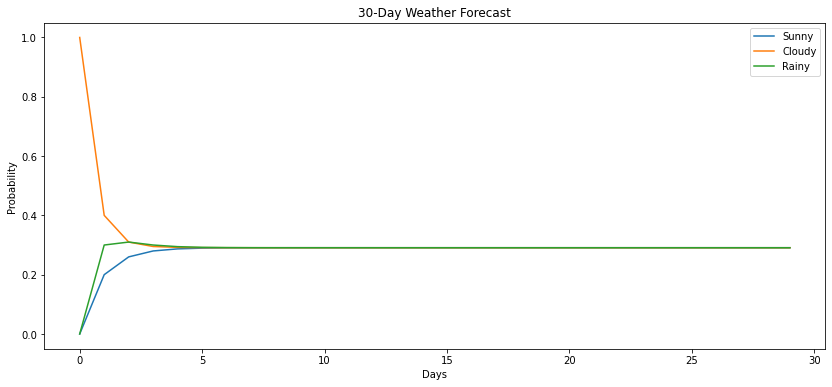

In [10]:
#Write your answer here.
### Q1bii Do a weather forecast for the next 30 days given that today is CLOUDY, plot your result

NumDays = 30
TodayCond = 'Cloudy'

WeatherPred = np.zeros((NumDays, len(StatesData)))

StateIndex = dict(zip(StatesData, range(len(StatesData))))

WeatherPred[0, StateIndex[TodayCond]] = 1

for i in range(1, NumDays):
    for j in range(len(StatesData)):
        WeatherPred[i, j] = np.dot(WeatherPred[i-1, :], TransitionMatrix[j])

plt.figure(figsize=(14, 6))
for i, state in enumerate(StatesData):
    plt.plot(WeatherPred[:, i], label=state)
plt.legend()
plt.title('30-Day Weather Forecast')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.show()



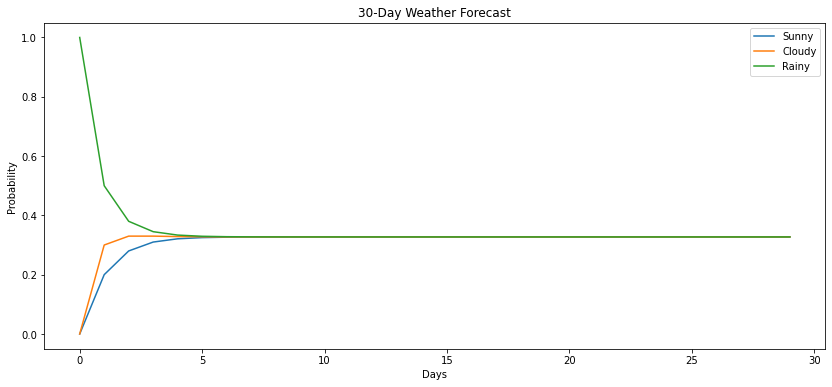

In [19]:
#Write your answer here.
### Q1biii Do a weather forecast for the next 30 days given that today is RAINY, plot your result

NumDays = 30
TodayCond = 'Rainy'

WeatherPred = np.zeros((NumDays, len(StatesData)))

StateIndex = dict(zip(StatesData, range(len(StatesData))))

WeatherPred[0, StateIndex[TodayCond]] = 1

for i in range(1, NumDays):
    for j in range(len(StatesData)):
        WeatherPred[i, j] = np.dot(WeatherPred[i-1, :], TransitionMatrix[j])

plt.figure(figsize=(14, 6))
for i, state in enumerate(StatesData):
    plt.plot(WeatherPred[:, i], label=state)
plt.legend()
plt.title('30-Day Weather Forecast')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.show()



In [ ]:
#Q1c Compuate the long-run unconditional stationary distribution of the weather, i.e.,  𝑃(𝑠𝑢𝑛𝑛𝑦),𝑃(𝑐𝑙𝑜𝑢𝑑𝑦),𝑃(𝑟𝑎𝑖𝑛𝑦)
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Define the transition matrix (example values, replace with actual transition matrix)
TransitionMatrix = np.array([
    [0.6, 0.2, 0.2],
    [0.3, 0.4, 0.3],
    [0.2, 0.3, 0.5]
])

# Calculate eigenvalues and eigenvectors
eig_value, eig_vector = eig(np.transpose(TransitionMatrix))

# Find the eigenvector associated with the eigenvalue 1 (or the closest to 1 within numerical error)
index = np.argmin(np.abs(eig_value - 1))
stationary_vector = np.real(eig_vector[:, index])  # Take only the real part of the eigenvector

# Normalize the stationary vector to have a sum of 1
stationary_distribution = stationary_vector / np.sum(stationary_vector)

stationary_distribution = np.abs(stationary_distribution)




### Q2

a. Download the csv file "GOOG.csv" from ummmoodle website and read the historical data of google (GOOG). Plot the time series of close price. 

b. Compute daily log returns and plot the histogram.

c. Compute the sample mean and standard deviation of the log returns.Superimpose the pdf a normal distribution with the same mean and standard deviation as GOOG's log return to the histogram in 2. 

d. Suppose that we invest 1000 US dollar in GOOL on 2023 Feb 28 and hold the stocks for 5 days. Use Simulation method from Lect 8 to compute dollar value of VaR.

Write your solution in the following cell. 


In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install scipy
!pip install matplotlib

In [2]:
import pandas as pd
import yfinance as yf
#if have n't install then do 'pip install yfinance'
from yahoofinancials import YahooFinancials
# if haven't install then do 'pip install YahooFinancials'


In [3]:
import yfinance as yf

GOOG = yf.Ticker("GOOG")

# get stock info
GOOG.info

{'address1': '1600 Amphitheatre Parkway',
 'city': 'Mountain View',
 'state': 'CA',
 'zip': '94043',
 'country': 'United States',
 'phone': '650 253 0000',
 'website': 'https://abc.xyz',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, devices, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play and YouTube;

In [4]:
ticker = yf.Ticker('GOOG')
GOOG_df = ticker.history(period="10y")
print(GOOG_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-03-07 00:00:00-05:00 to 2024-03-06 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   float64
 6   Stock Splits  2517 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.3 KB
None


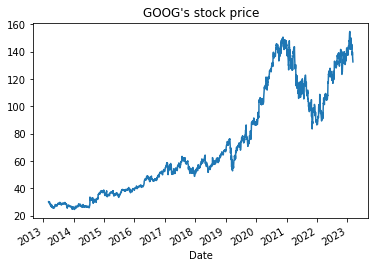

In [6]:
#Write your answer here.
#2a. Download the csv file "GOOG.csv" from ummmoodle website and read the historical data of google (GOOG). Plot the time series of close price.
import pandas as pd
import matplotlib.pyplot as plt

GOOG_df['Close'].plot(title="GOOG's stock price")
GoogData=GOOG_df['Close']
plt.show()

2517
[-0.00265421 -0.00960378  0.00607325 ... -0.02850204 -0.00313455
 -0.0091613 ]


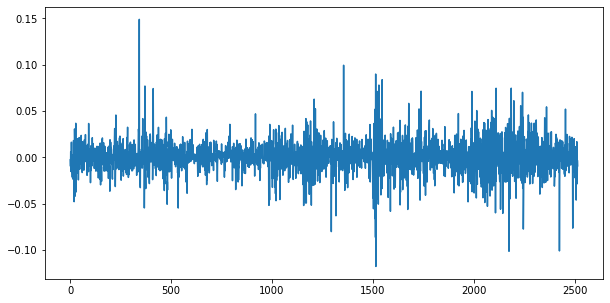

In [8]:
#b. Compute daily log returns and plot the histogram.
import numpy as np
plt.figure(figsize=(10,5))
n=len(GoogData)
print(n)
Rt=np.diff((np.log(GoogData)))
#print(np.log(GoogData))
print(Rt)
plt.plot(Rt)
plt.show()

0.000587173903608998
0.01763189225240201


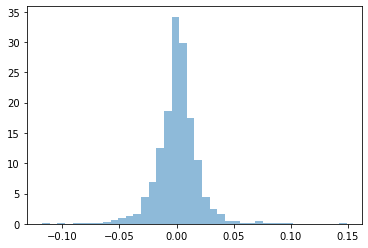

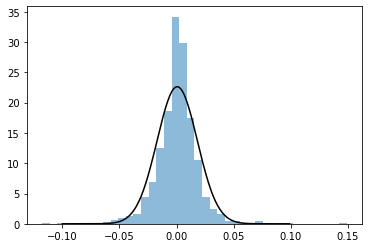

In [9]:
#b. Compute daily log returns and plot the histogram.
hatmu=np.array(Rt.mean())
hatsig = np.array(Rt.std())
print(hatmu)
print(hatsig)

plt.figure()
plt.hist(Rt,bins=40, density=True, histtype='stepfilled',alpha=0.5)
plt.show()

# Compare with normal
from scipy.stats import norm
data = np.arange(-0.1,0.1,0.001)
pdf = norm.pdf(data , loc = hatmu , scale = hatsig )
 
#Visualizing the distribution

plt.figure()
plt.hist(Rt, bins=40,density=True, histtype='stepfilled',alpha=0.5)
plt.plot(data, pdf , color = 'black')
plt.show()

Save your solution to be quiz2_yourlastname_yourstudentid.ipynb.

Submit on ummoodle within today before 23:59pm (March 7). Later submission will suffer from point deduction: 25\% for each day.